# Data Visualizaion in R

``ggplot2`` is an aesthetically pleasing (and very popular) graphics framework in R. This notebook is primarily geared towards creating complex and nice looking charts with R's ``ggplot2``. It takes care of many of the fiddly details that make plotting a hassle (like drawing legends) as well as providing a powerful model of graphics that makes it easy to produce complex multi-layered graphics.

## Scatter Plot

Whenever we want to understand the nature of relationship between two variables, invariably the first choice is the scatterplot. It can be drawn using ``geom_point()``. Additionally, ``geom_smooth`` which draws a smoothing line (based on loess) by default, can be tweaked to draw the line of best fit by setting ``method='lm``. Lets load some libraries and settings

In [1]:
options(scipen=999)  # turn-off scientific notation like 1e+48
library(ggplot2)
theme_set(theme_bw())  # pre-set the bw theme.

Now load data midewest and iris for later

In [2]:
data("midwest", package = "ggplot2")

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

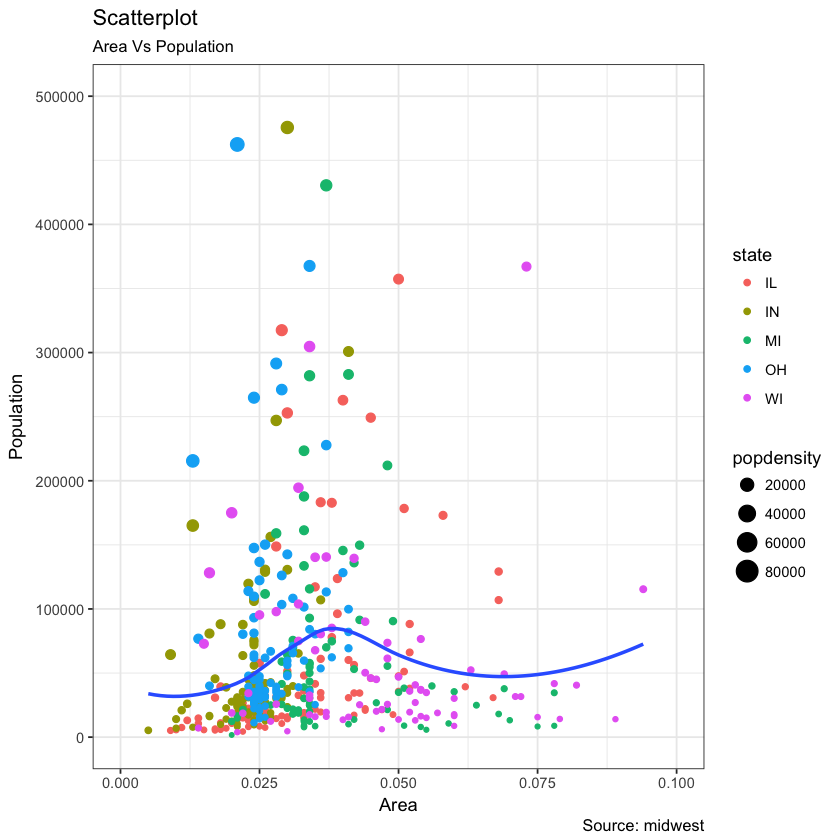

In [3]:
# Scatterplot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 0.1)) + 
  ylim(c(0, 500000)) + 
  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot", 
       caption = "Source: midwest")

plot(gg)

The ``shape`` parameter in geom_point can be used to modify the plotting characters too.

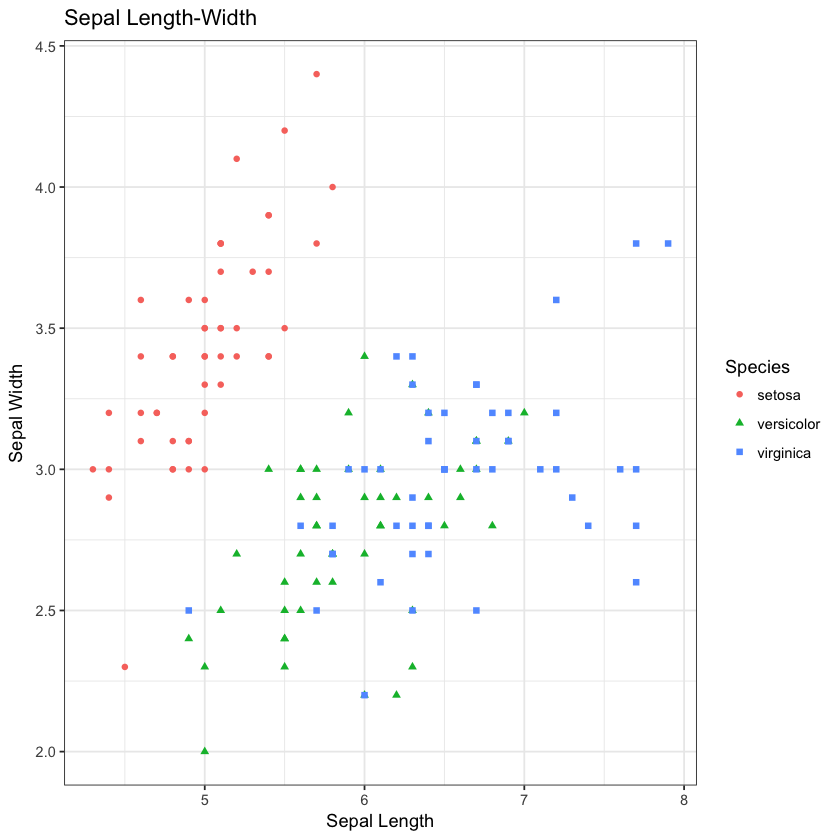

In [4]:
scatter <- ggplot(data=iris, aes(x = Sepal.Length, y = Sepal.Width)) 
scatter + geom_point(aes(color=Species, shape=Species)) +
  xlab("Sepal Length") +  ylab("Sepal Width") +
  ggtitle("Sepal Length-Width")

When presenting the results, sometimes we would encirlce certain special group of points or region in the chart so as to draw the attention to those peculiar cases. This can be conveniently done using the ``geom_encircle()`` in ``ggalt`` package. Within ``geom_encircle()``, set the data to a new dataframe that contains only the points (rows) or interest. Moreover, You can expand the curve so as to pass just outside the points. The color and size (thickness) of the curve can be modified as well

## Jitter Plot

Let’s look at a new data to draw the scatterplot. This time, we will use the mpg dataset to plot city mileage (cty) vs highway mileage (hwy)

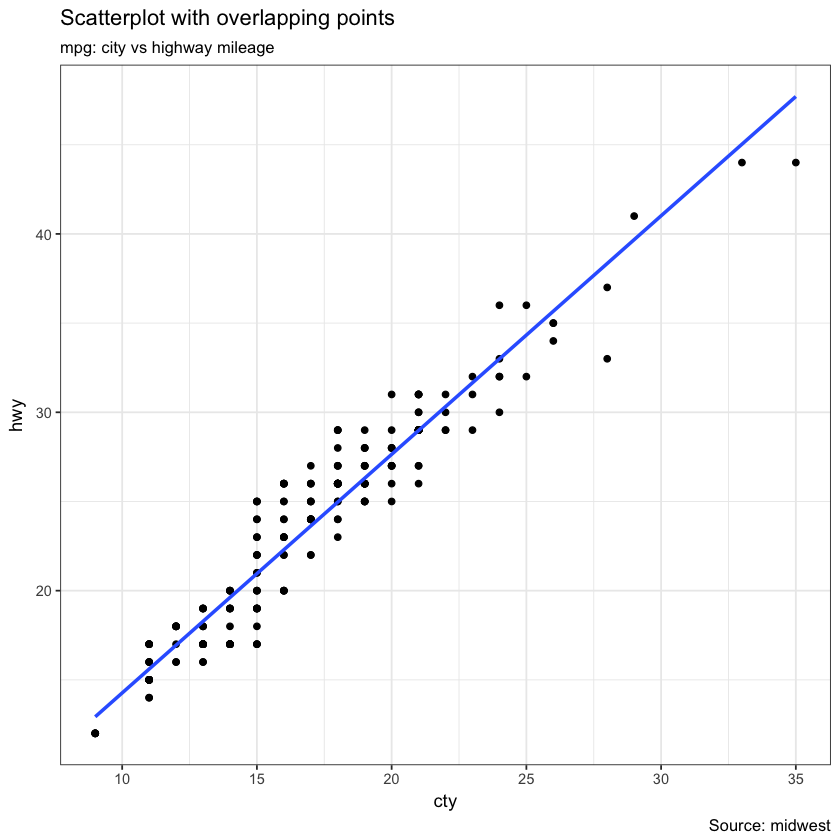

In [5]:
data(mpg, package="ggplot2")
g <- ggplot(mpg, aes(cty, hwy))
# Scatterplot
g + geom_point() + 
  geom_smooth(method="lm", se=F) +
  labs(subtitle="mpg: city vs highway mileage", 
       y="hwy", 
       x="cty", 
       title="Scatterplot with overlapping points", 
       caption="Source: midwest")

The original data has 234 data points but the chart seems to display fewer points. What has happened? This is because there are many overlapping points appearing as a single dot. We can make a jitter plot with ``geom_jitter()``. As the name suggests, the overlapping points are randomly jittered around its original position based on a threshold controlled by the width argument.

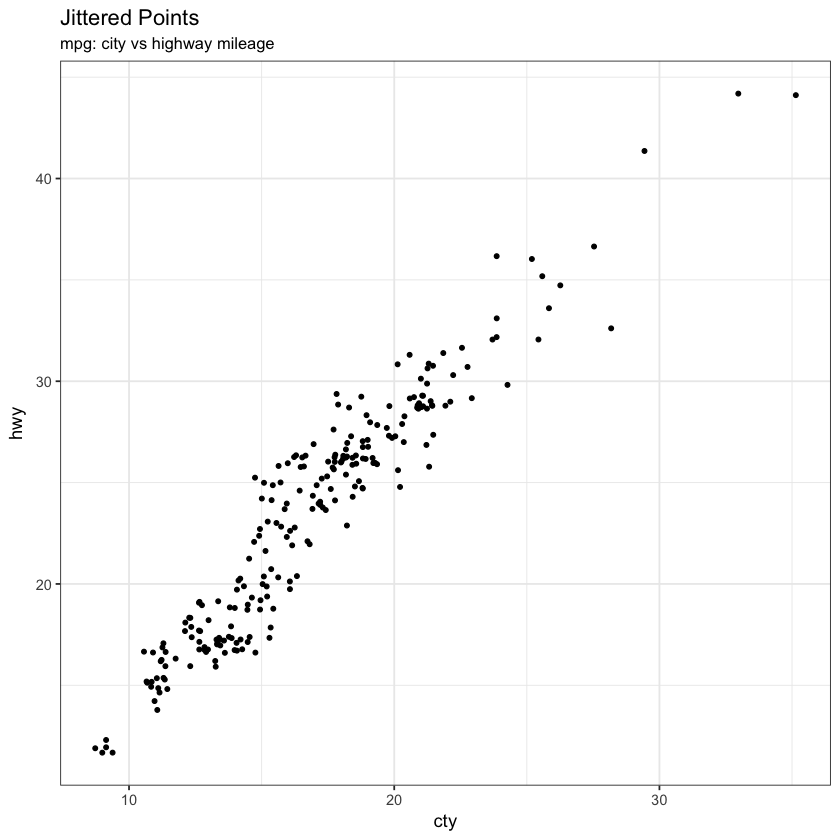

In [6]:
g <- ggplot(mpg, aes(cty, hwy))
g + geom_jitter(width = .5, size=1) +
  labs(subtitle="mpg: city vs highway mileage", 
       y="hwy", 
       x="cty", 
       title="Jittered Points")

## Count chart
The second option to overcome the problem of data points overlap is to use what is called a counts chart. Whereever there is more points overlap, the size of the circle gets bigger.

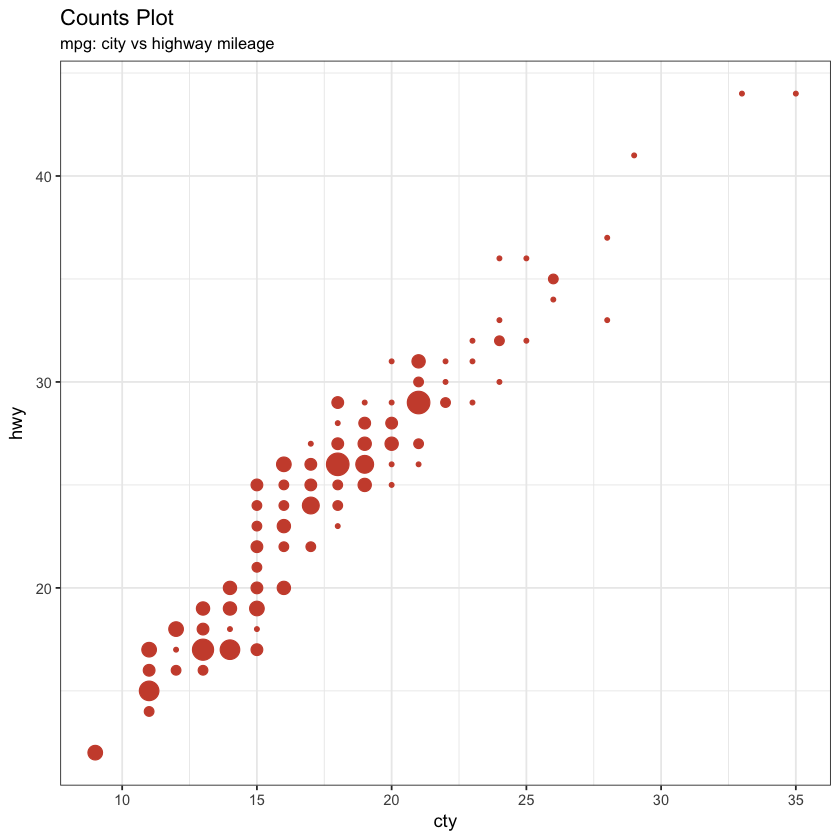

In [7]:
g <- ggplot(mpg, aes(cty, hwy))
g + geom_count(col="tomato3", show.legend=F) +
  labs(subtitle="mpg: city vs highway mileage", 
       y="hwy", 
       x="cty", 
       title="Counts Plot")

## Bubble plot

While scatterplot lets you compare the relationship between 2 continuous variables, bubble chart serves well if you want to understand relationship within the underlying groups.

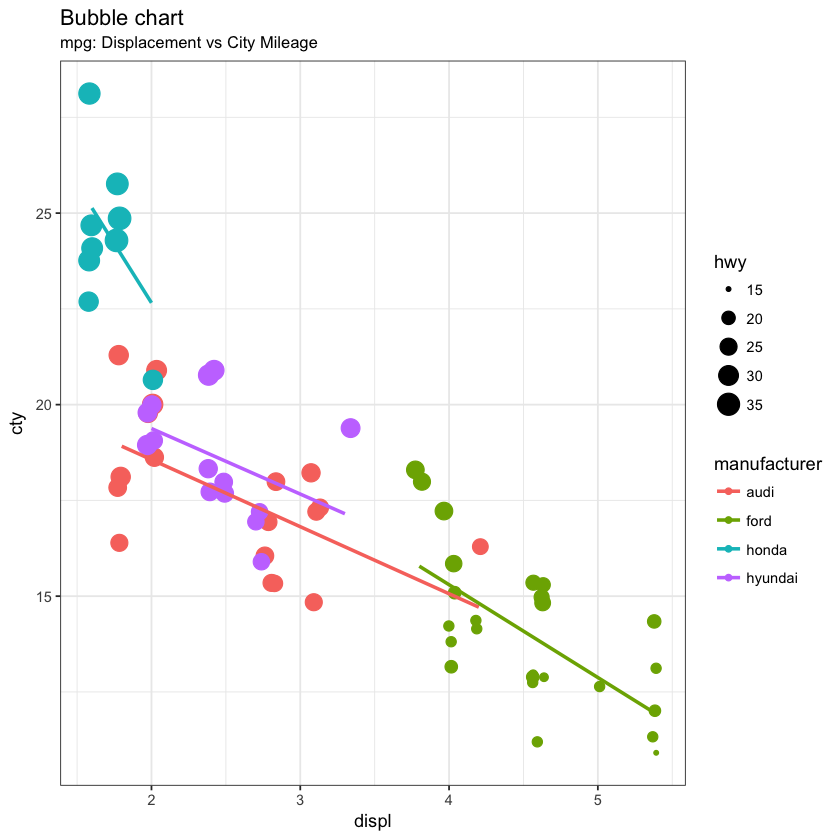

In [8]:
data(mpg, package="ggplot2")
mpg_select <- mpg[mpg$manufacturer %in% c("audi", "ford", "honda", "hyundai"), ]
g <- ggplot(mpg_select, aes(displ, cty)) + 
  labs(subtitle="mpg: Displacement vs City Mileage",
       title="Bubble chart")
g + geom_jitter(aes(col=manufacturer, size=hwy)) + 
  geom_smooth(aes(col=manufacturer), method="lm", se=F)

## Marginal Histogram

If we want to show the relationship as well as the distribution in the same chart, use the marginal histogram. It has a histogram of the X and Y variables at the margins of the scatterplot.

This can be implemented using the ``ggMarginal()`` function from the ``ggExtra`` package

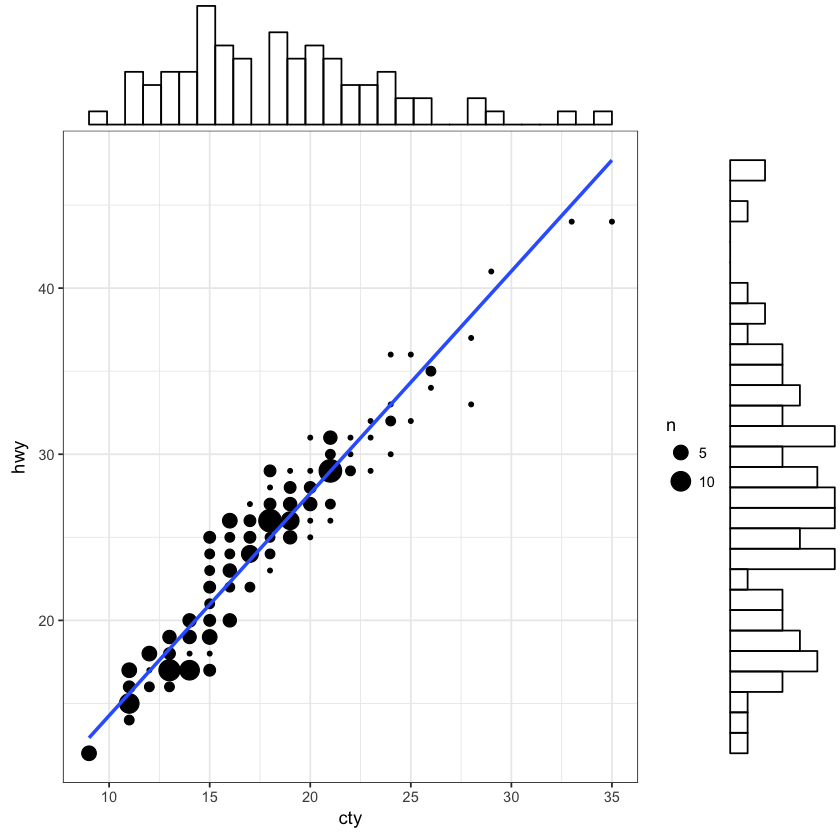

In [9]:
#install.packages("ggExtra")
library(ggExtra)

mpg_select <- mpg[mpg$hwy >= 35 & mpg$cty > 27, ]
g <- ggplot(mpg, aes(cty, hwy)) + 
  geom_count() + 
  geom_smooth(method="lm", se=F)

ggMarginal(g, type = "histogram", fill="transparent")

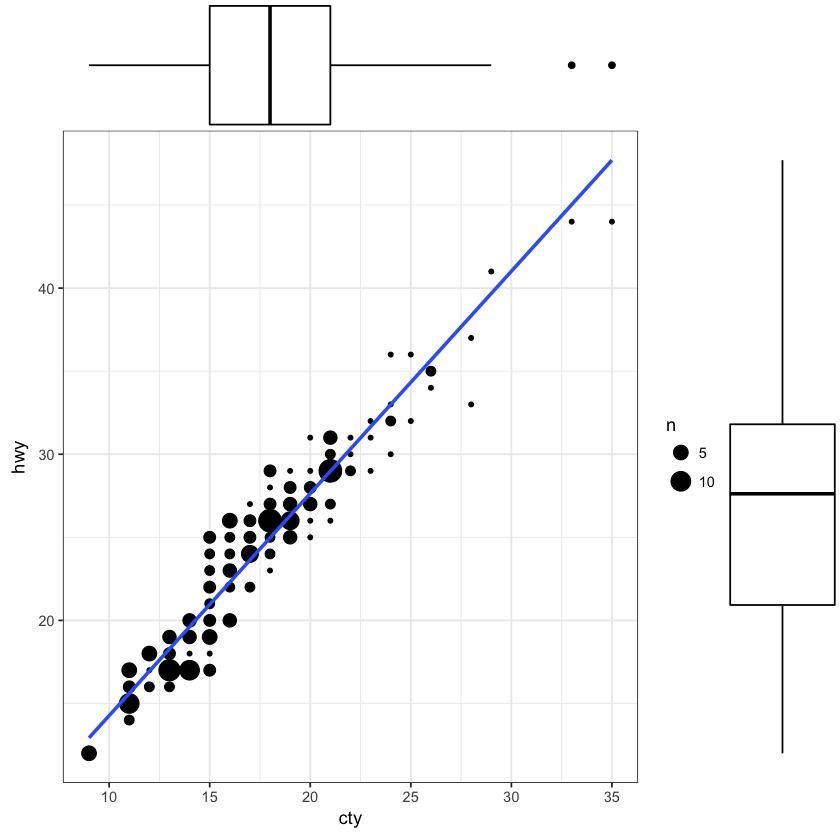

In [10]:
ggMarginal(g, type = "boxplot", fill="transparent")

## Correlogram

Correlogram let’s you examine the corellation of multiple continuous variables present in the same dataframe. This is conveniently implemented using the ggcorrplot package

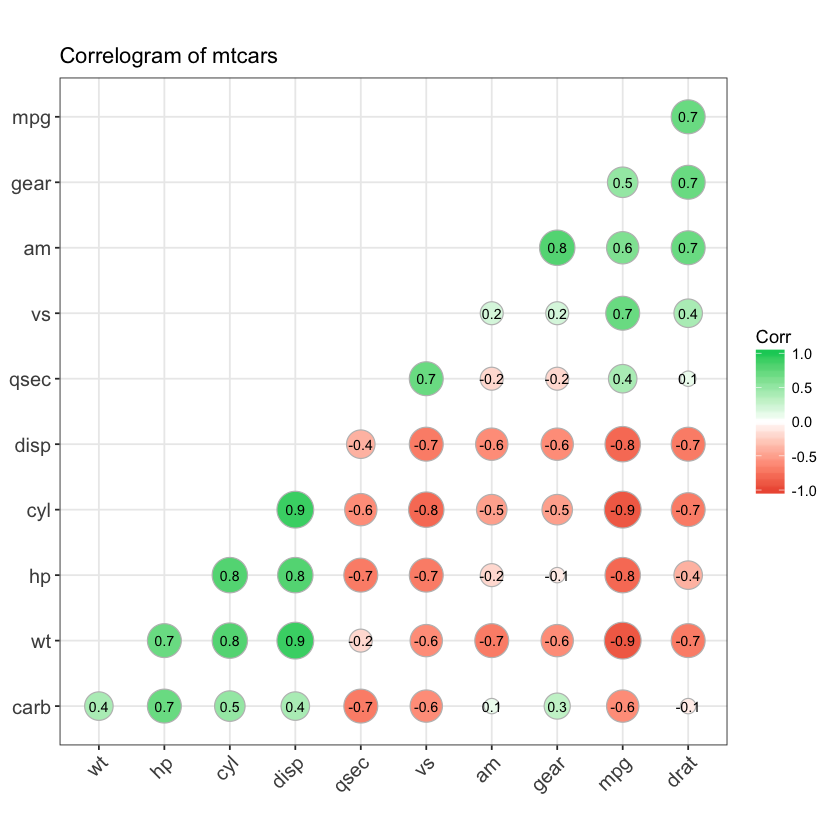

In [11]:
#devtools::install_github("kassambara/ggcorrplot")
library(ggcorrplot)

# Correlation matrix
data(mtcars)
corr <- round(cor(mtcars), 1)

# Plot
ggcorrplot(corr, hc.order = TRUE, 
           type = "lower", 
           lab = TRUE, 
           lab_size = 3, 
           method="circle", 
           colors = c("tomato2", "white", "springgreen3"), 
           title="Correlogram of mtcars", 
           ggtheme=theme_bw)

## Box Plot, Histogram, Bar chart, Pie Chart and Density plot

How about some Box Plots, Histograms, and Bar charts further? 

## Box Plot

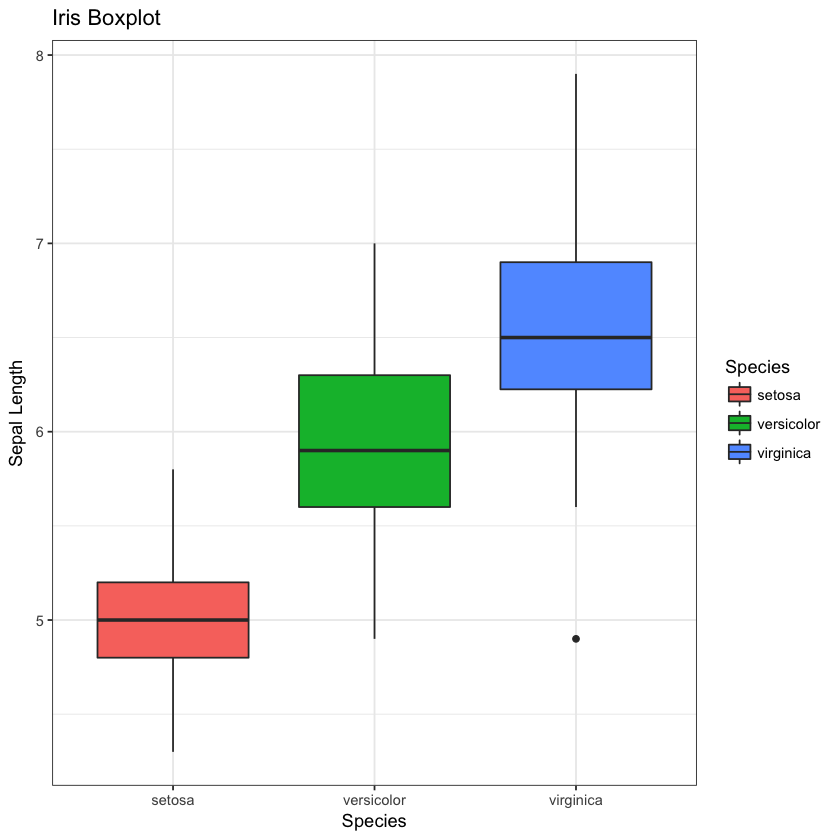

In [12]:
# Box Plot
box <- ggplot(data=iris, aes(x=Species, y=Sepal.Length))
box + geom_boxplot(aes(fill=Species)) + 
  ylab("Sepal Length") + ggtitle("Iris Boxplot") 

## Histogram

By default, if only one variable is supplied, the ``geom_bar()`` tries to calculate the count. In order for it to behave like a bar chart, the ``stat=identity`` option has to be set and ``x`` and ``y`` values must be provided.

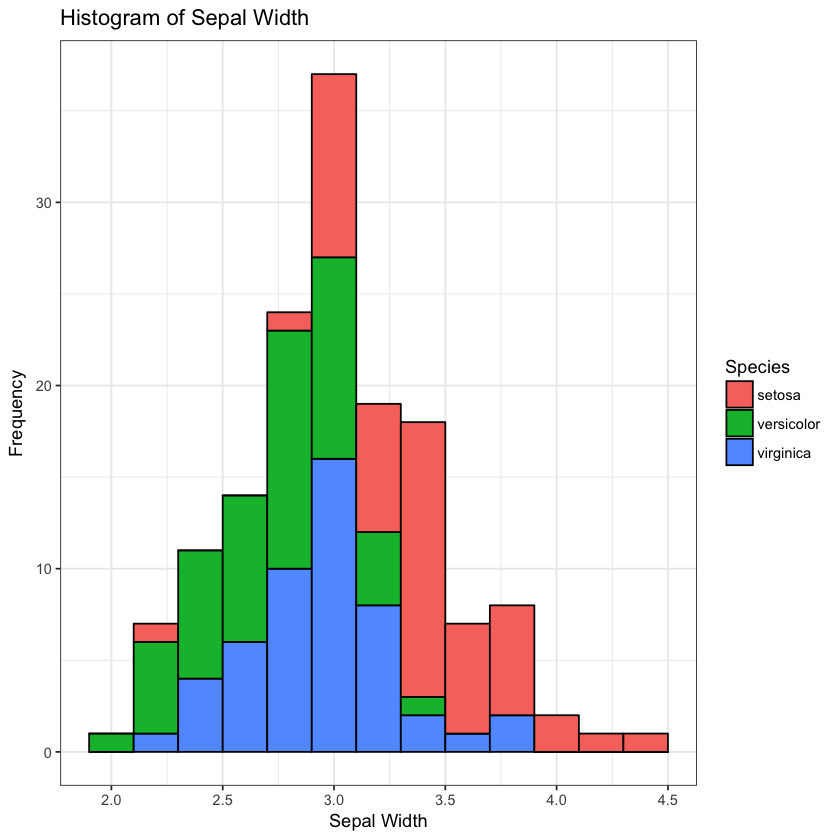

In [13]:
library(ggplot2)
histogram <- ggplot(data=iris, aes(x=Sepal.Width))
histogram + geom_histogram(binwidth=0.2, color="black", aes(fill=Species)) + 
  xlab("Sepal Width") +  ylab("Frequency") + ggtitle("Histogram of Sepal Width")

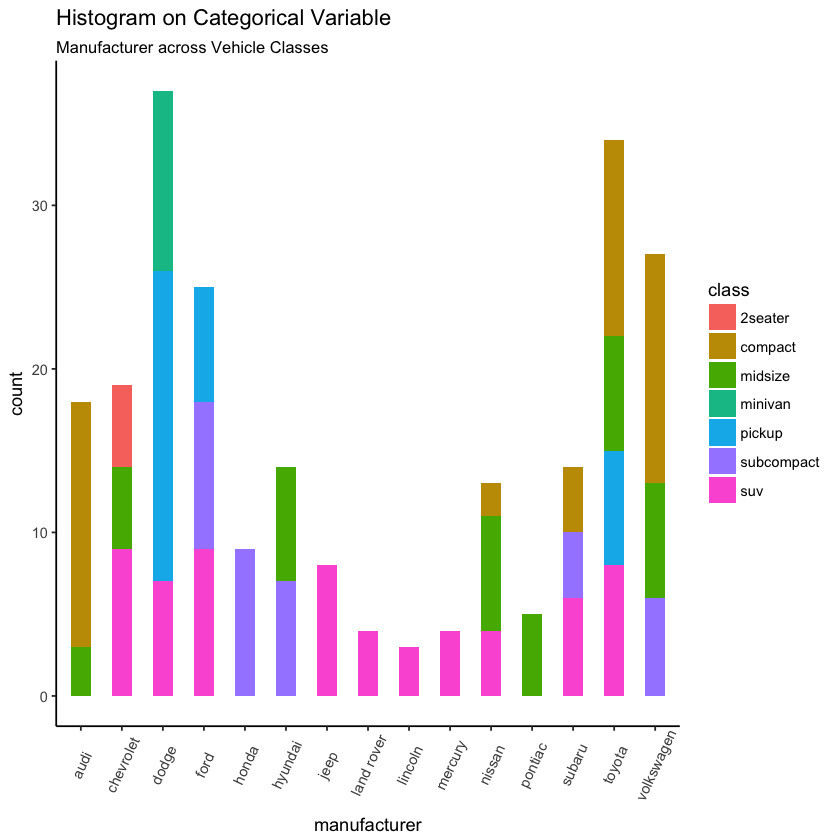

In [14]:
theme_set(theme_classic())

# Histogram on a Categorical variable
g <- ggplot(mpg, aes(manufacturer))
g + geom_bar(aes(fill=class), width = 0.5) + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  labs(title="Histogram on Categorical Variable", 
       subtitle="Manufacturer across Vehicle Classes") 

## Bar Chart

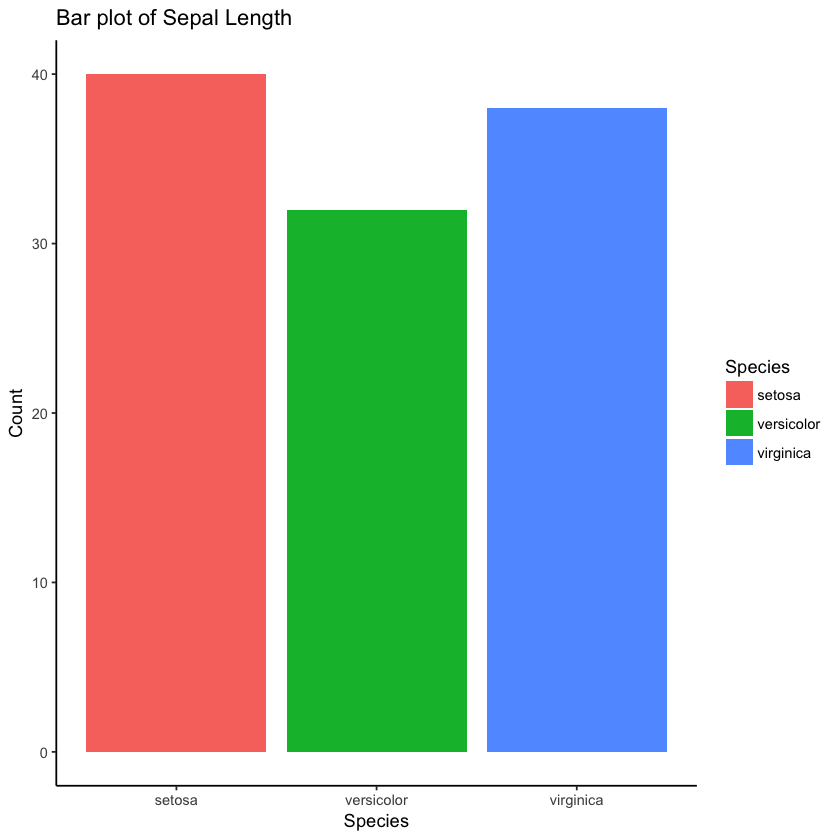

In [15]:
set.seed(1234)
iris1 <- iris[sample(1:nrow(iris), 110), ]
bar <- ggplot(data=iris1, aes(x=Species,fill=Species))
bar + geom_bar() + 
  xlab("Species") +  ylab("Count") + ggtitle("Bar plot of Sepal Length")

In [16]:
library(reshape2)
iris2 <- melt(iris, id.vars="Species")
iris2[1:3,]

Species,variable,value
setosa,Sepal.Length,5.1
setosa,Sepal.Length,4.9
setosa,Sepal.Length,4.7


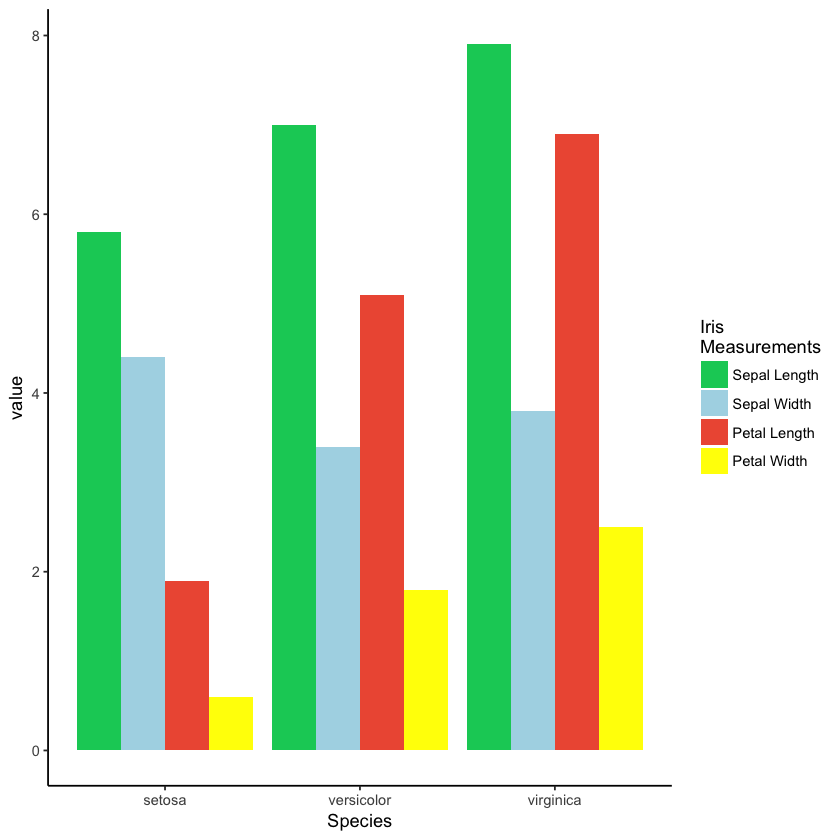

In [17]:
bar1 <- ggplot(data=iris2, aes(x=Species, y=value, fill=variable))
bar1 + geom_bar(stat="identity", position="dodge") + 
  scale_fill_manual(values=c("springgreen3", "lightblue", "tomato2", "yellow"),
                    name="Iris\nMeasurements",
                    breaks=c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"),
                    labels=c("Sepal Length", "Sepal Width", "Petal Length", "Petal Width"))

## Pie Chart

Pie chart, a classic way of showing the compositions is equivalent to the waffle chart in terms of the information conveyed. But is a slightly tricky to implement in ggplot2 using the ``coord_polar()``

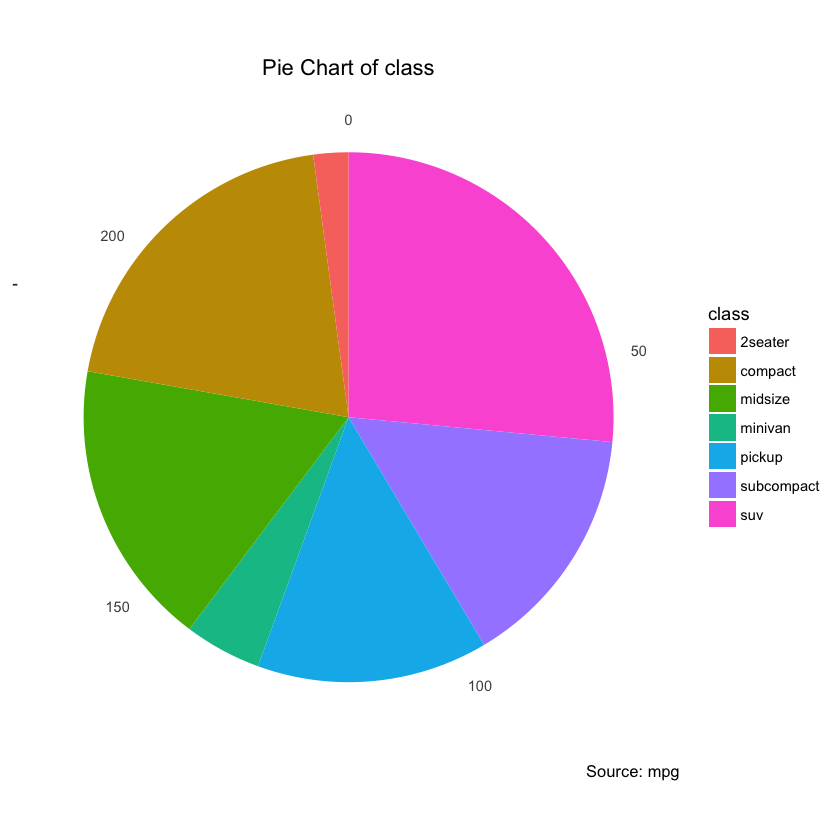

In [20]:
theme_set(theme_classic())

# Source: Frequency table
df <- as.data.frame(table(mpg$class))
colnames(df) <- c("class", "freq")
pie <- ggplot(df, aes(x = "", y=freq, fill = factor(class))) + 
  geom_bar(width = 1, stat = "identity") +
  theme(axis.line = element_blank(), 
        plot.title = element_text(hjust=0.5)) + 
  labs(fill="class", 
       x=NULL, 
       y=NULL, 
       title="Pie Chart of class", 
       caption="Source: mpg")
pie + coord_polar(theta = "y", start=0)

## Density Plot

Kernal density plots are usually a much more effective way to view the distribution of a variable

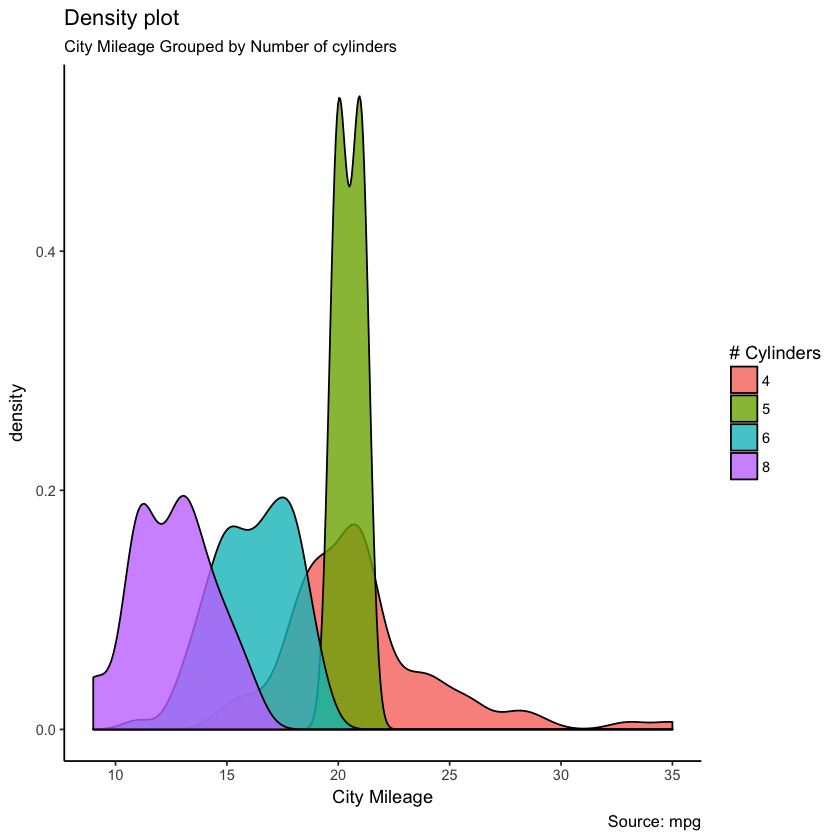

In [19]:
# Plot
g <- ggplot(mpg, aes(cty))
g + geom_density(aes(fill=factor(cyl)), alpha=0.8) + 
    labs(title="Density plot", 
         subtitle="City Mileage Grouped by Number of cylinders",
         caption="Source: mpg",
         x="City Mileage",
         fill="# Cylinders")